# Resultado de la ronda en función del uso de utilidades

Bibliotecas necesarias para la ejecución

In [3]:
import pyodbc 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Definición de parámetros para la conexión con la base de datos

In [4]:
conn_str_esea = (
    r'Driver={SQL Server};'
    r'Server=localhost\MSSQLSERVER01;'
    r'Database=csgo_esea;'
    r'Trusted_Connection=yes;'
    )
cnxn = pyodbc.connect(conn_str_esea)

Definición de query de obtención de datos

In [17]:
query = "select contador_ganador, contador_perdedor, count(*) contador from (select a.[file],a.[round],A.contador contador_ganador,B.contador-A.contador contador_perdedor from (SELECT  A.[file],A.[round],B.winner_side,count(B.winner_side) contador FROM [csgo_esea].[dbo].[grenades] A join [meta] B on A.[file]=B.[file] and A.[round]=B.[Round] where winner_side=att_side group by A.[file],A.[round],B.winner_side) A join (SELECT  A.[file],A.[round],B.winner_side,count(B.winner_side) contador FROM [csgo_esea].[dbo].[grenades] A join [meta] B on A.[file]=B.[file] and A.[round]=B.[Round] group by A.[file],A.[round],B.winner_side) B on A.[file]=B.[file] and A.[round]=B.[Round] where A.contador<=25 and B.contador<=25) A group by contador_ganador, contador_perdedor order by contador_ganador, contador_perdedor"

Carga de datos en dataframes

In [18]:
data = pd.read_sql_query(query, cnxn)

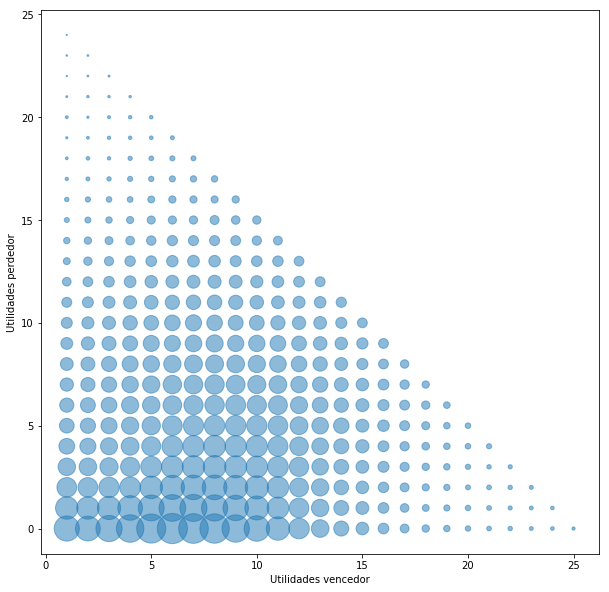

In [26]:
plt.figure(figsize=(10,10))

x = data['contador_ganador']
y = data['contador_perdedor']


fig = plt.scatter(x, y, s = data['contador']/5,alpha=0.5)
plt.xlabel('Utilidades vencedor')
plt.ylabel('Utilidades perdedor')

plt.show()